In [1]:
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Preprocess data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Split data 
from sklearn.model_selection import train_test_split

# Regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR

# Gridsearch
from sklearn.model_selection import GridSearchCV 

# Evaluation metrices
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [2]:
weather_df = pd.read_csv(r'weatherdata.csv', sep =",", encoding = "utf-8")
weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

<Axes: >

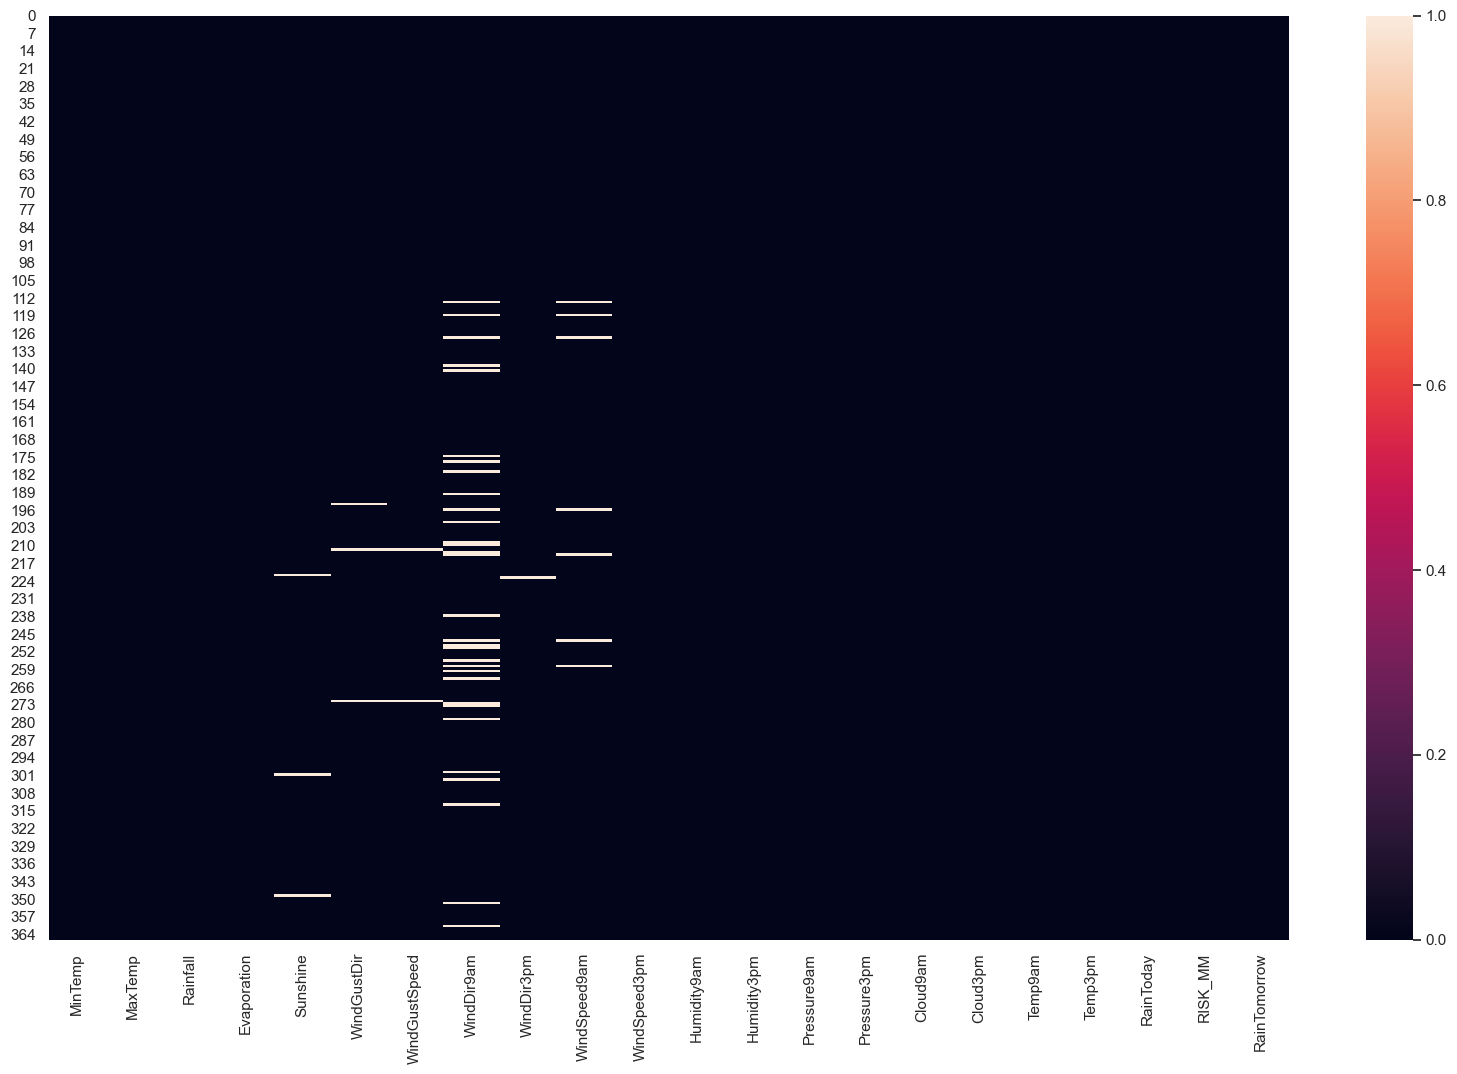

In [4]:
sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(weather_df.isnull())

In [5]:
def table (df):
    missing = df.isnull().sum()
    missing_perc = df.isnull().sum() * 100/ len(df)
    missing_df = pd.concat([missing,missing_perc], axis = 1)
    missing_df = missing_df.rename(columns={0:"n missing",1:"n percentage"})
    return missing_df
missing = table(weather_df)
missing.drop(missing.index[(missing["n missing"] == 0)],axis = 0 , inplace = True)
missing = missing.round(1)
missing = missing.sort_values(by = ["n percentage"],ascending = False)
missing = missing.reset_index()
missing

,index,n missing,n percentage
0,WindDir9am,31,8.5
1,WindSpeed9am,7,1.9
2,Sunshine,3,0.8
3,WindGustDir,3,0.8
4,WindGustSpeed,2,0.5
5,WindDir3pm,1,0.3


In [6]:
weather_df.dtypes.value_counts()

float64    12
object      5
int64       5
Name: count, dtype: int64

In [7]:
weather_df.select_dtypes("object").apply(pd.Series.nunique, axis = 0)

WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>],
       [<Axes: title={'center': 'RISK_MM'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

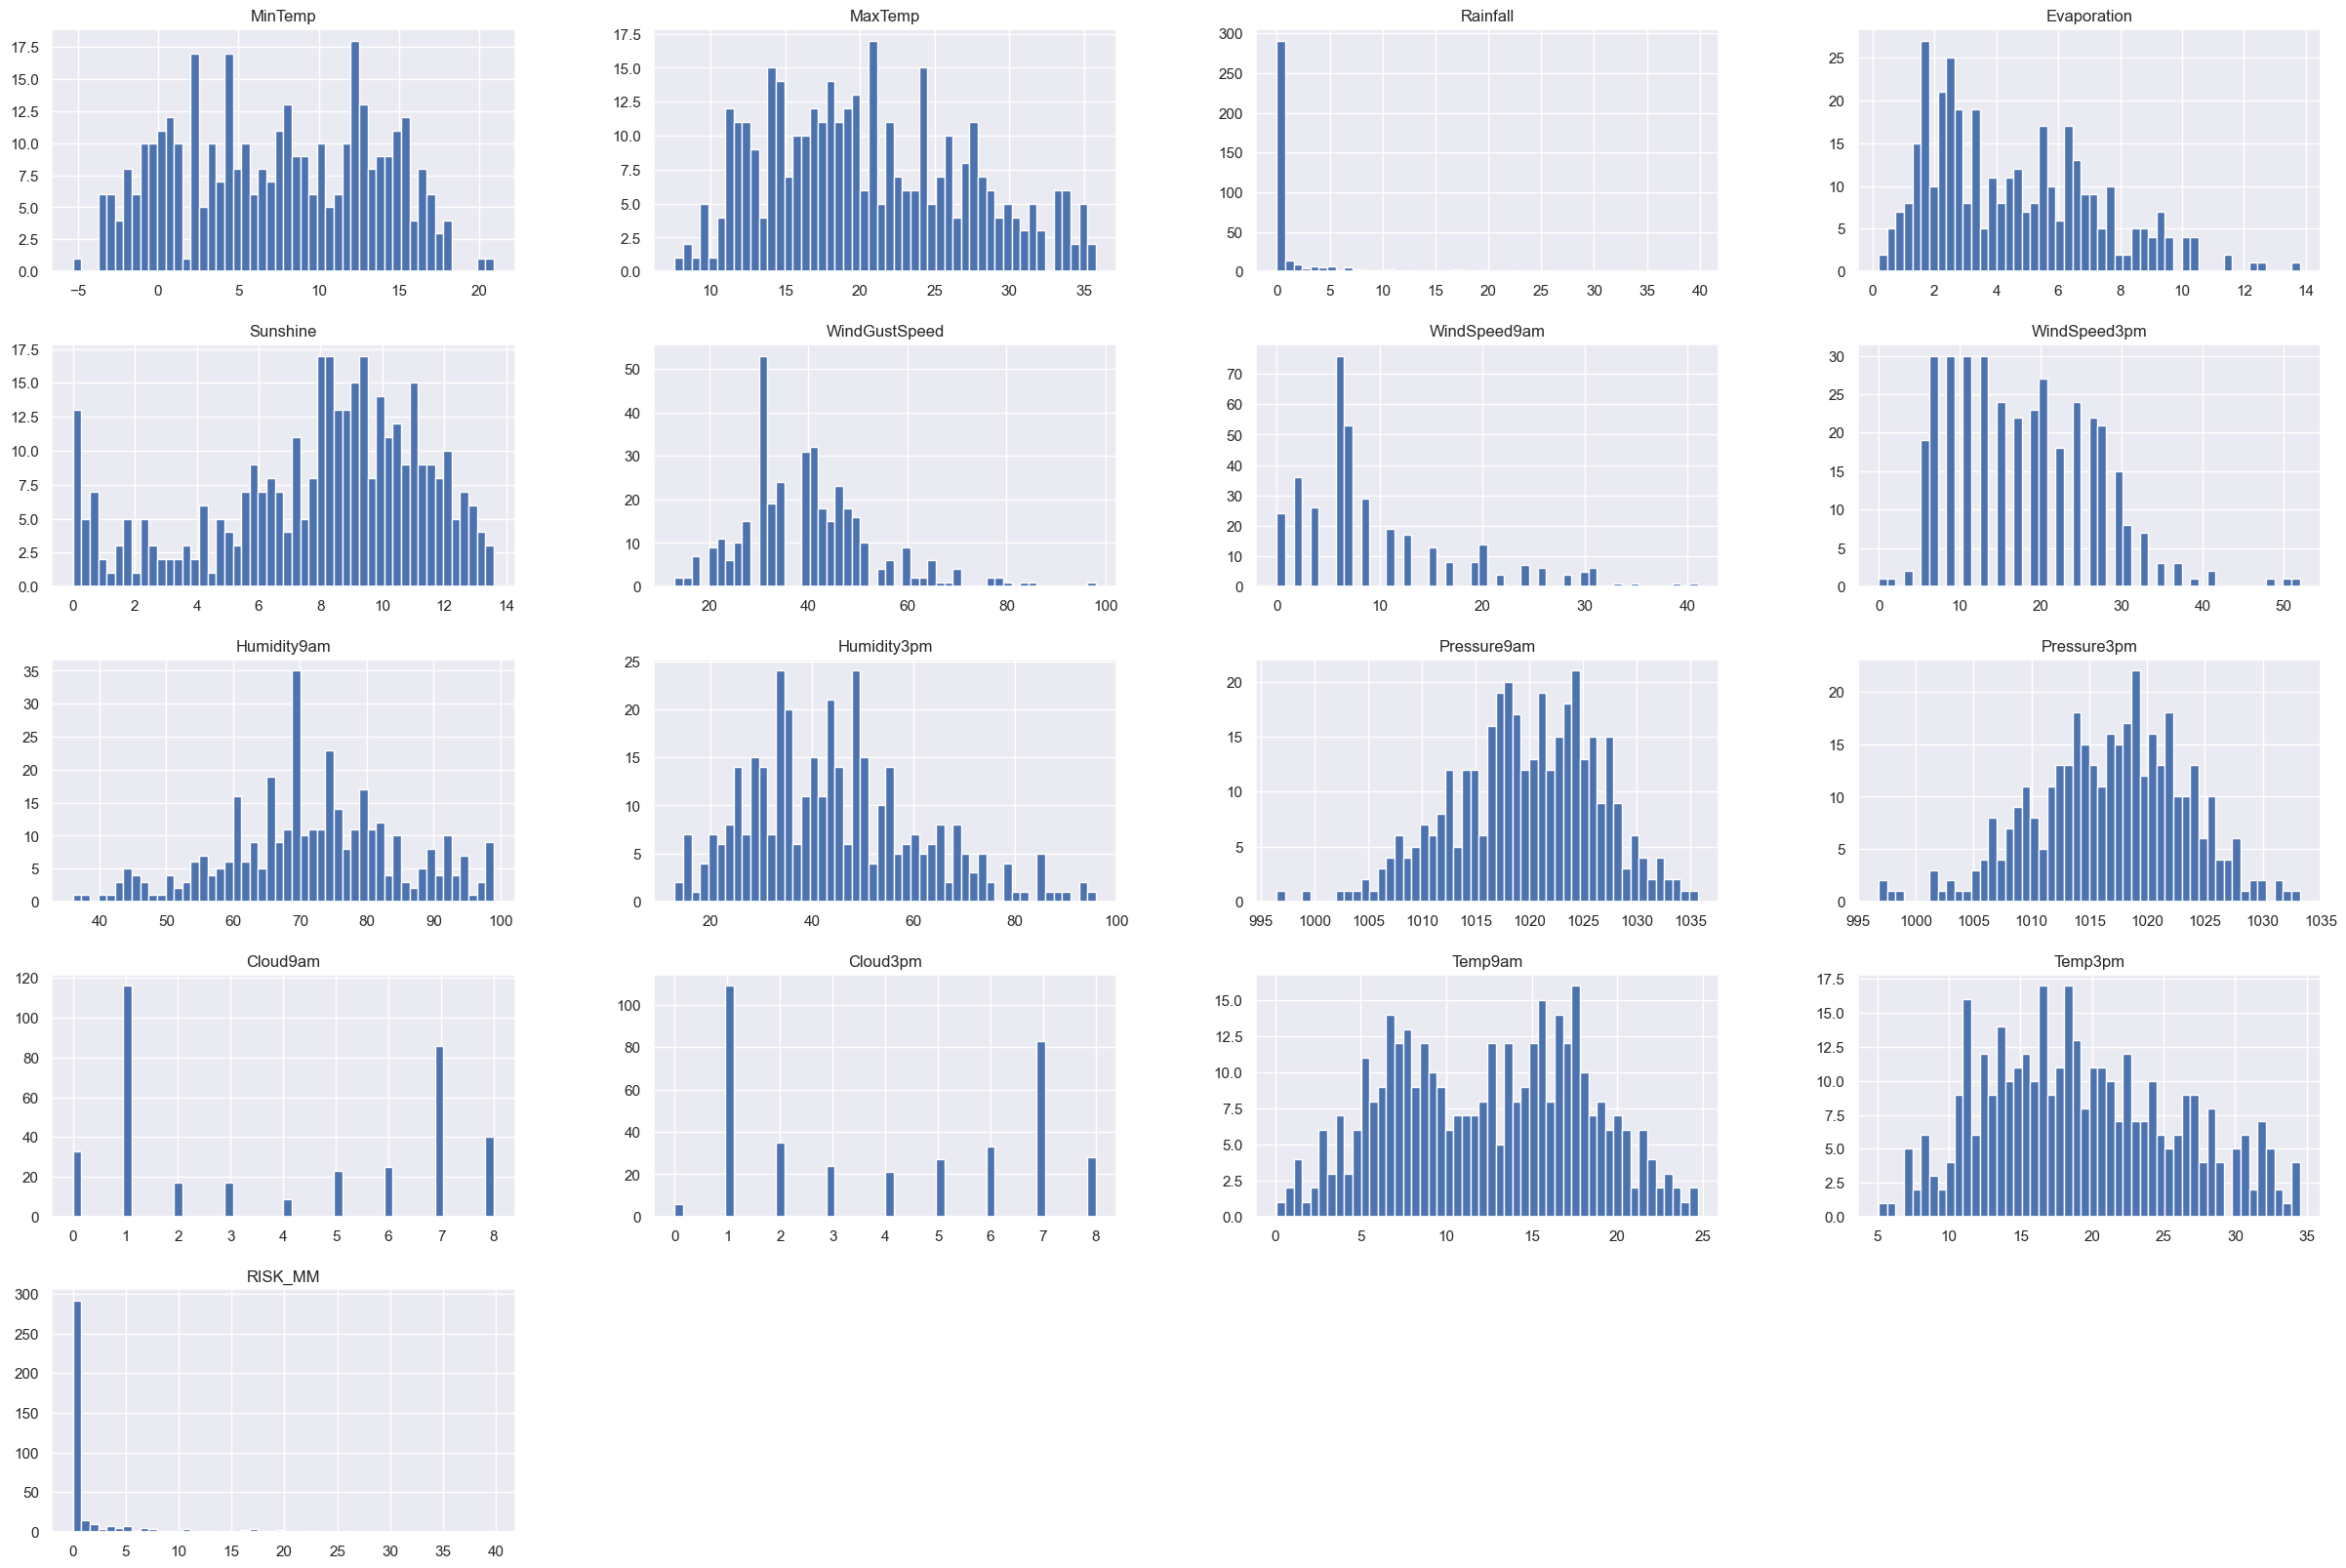

In [8]:
weather_df.hist(bins = 50 , figsize=(30 , 20))

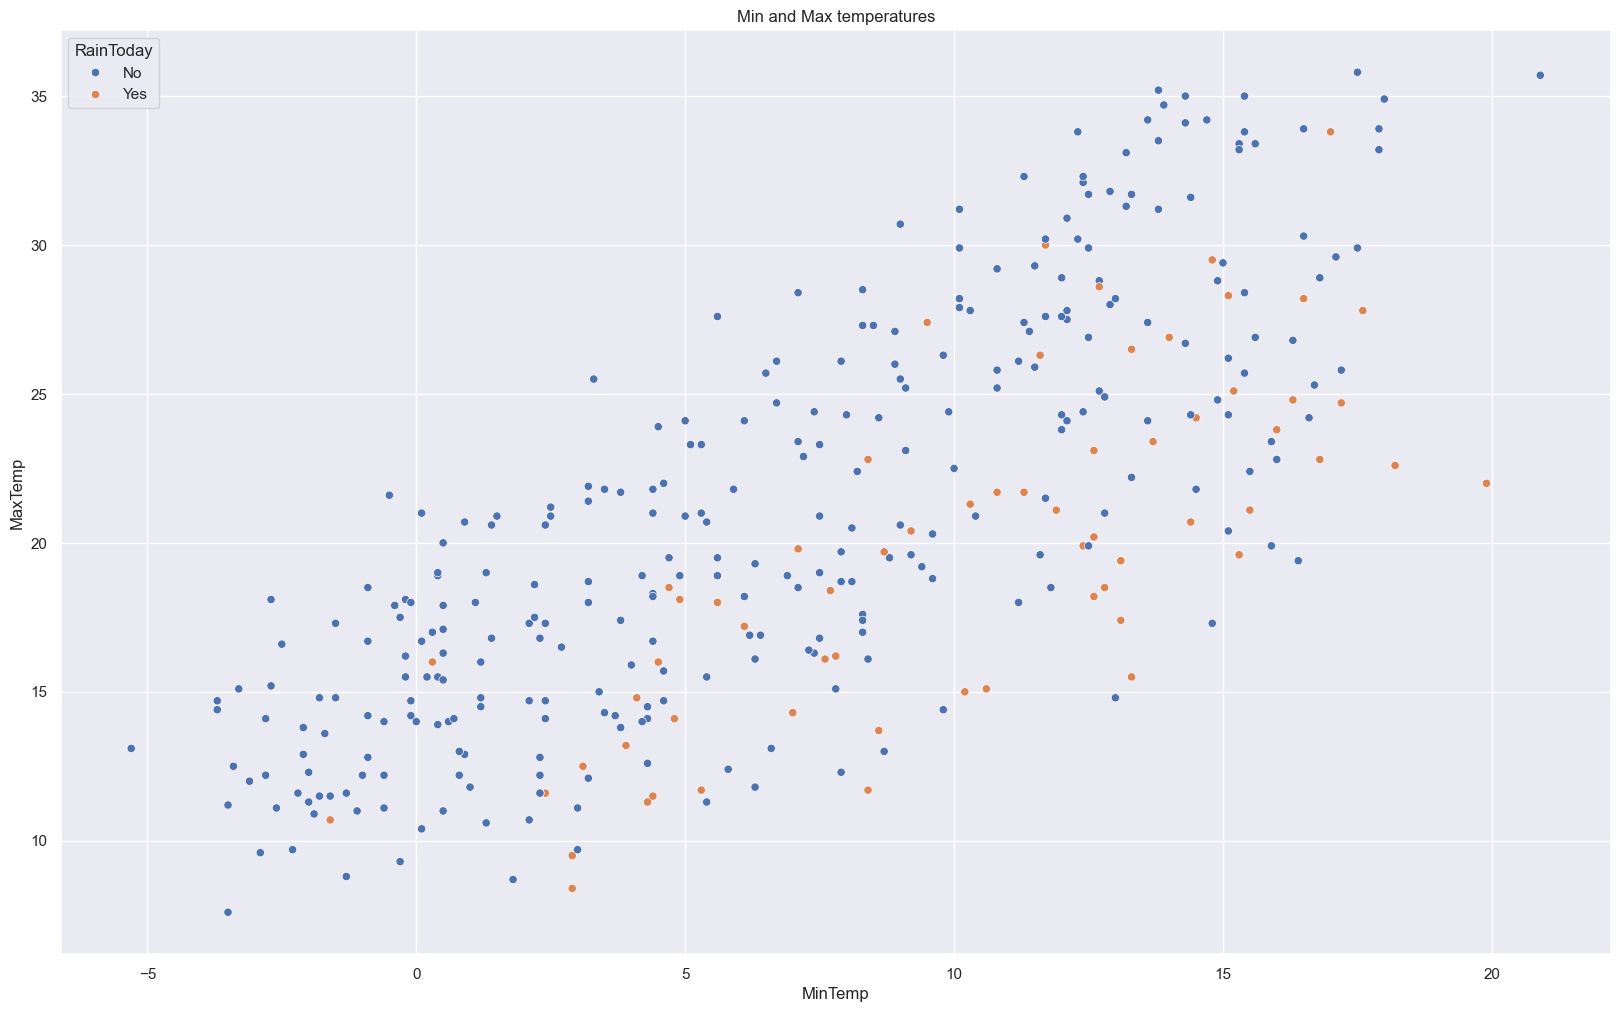

In [9]:
scatter = pd.DataFrame()
scatter["MinTemp"] = weather_df["MinTemp"]
scatter["MaxTemp"] = weather_df["MaxTemp"]
scatter["RainToday"] = weather_df["RainToday"]
scatter_plot = sns.scatterplot(data = scatter, x = "MinTemp",y="MaxTemp", hue="RainToday").set(title = 
                                        "Min and Max temperatures")

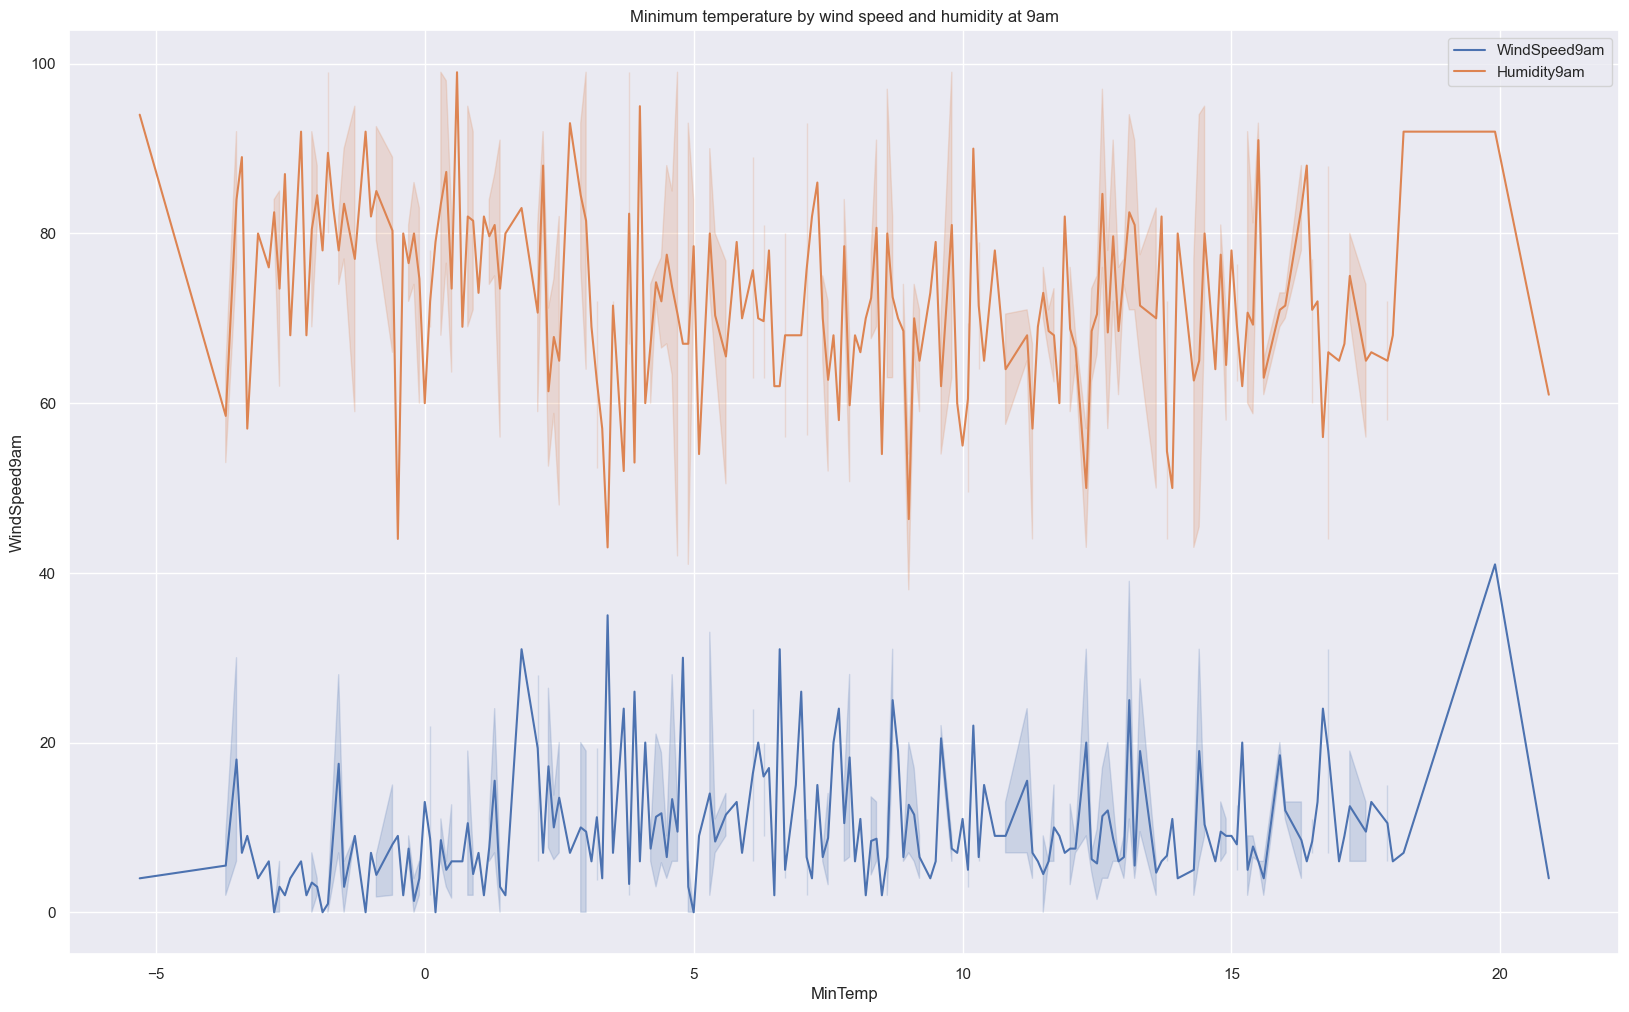

In [10]:
fig,ax = plt.subplots()
ax = sns.lineplot(data = weather_df,  x="MinTemp", y="WindSpeed9am",label = "WindSpeed9am")
ax1 = sns.lineplot(data = weather_df,  x="MinTemp",y="Humidity9am",label = "Humidity9am")
ax.set_title("Minimum temperature by wind speed and humidity at 9am")
plt.legend()


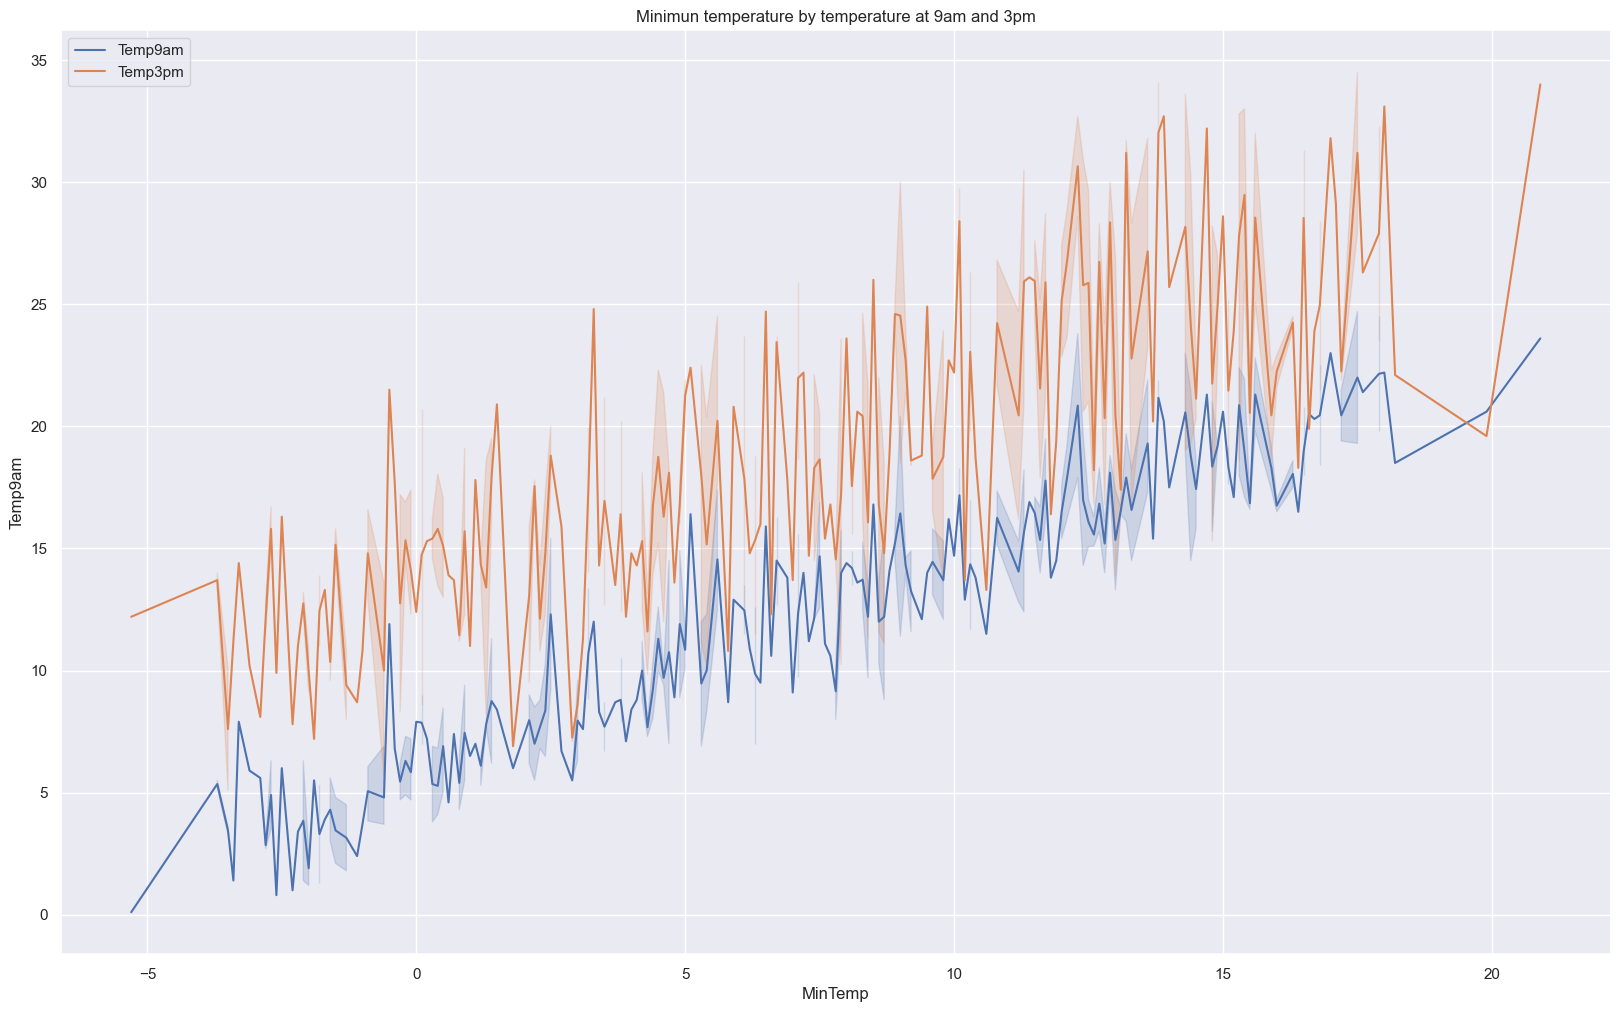

In [11]:
fig,ax = plt.subplots()
ax = sns.lineplot(data = weather_df,  x="MinTemp", y="Temp9am",label="Temp9am")
ax1 = sns.lineplot(data = weather_df,  x="MinTemp",y="Temp3pm",label = "Temp3pm")
ax.set_title("Minimun temperature by temperature at 9am and 3pm")
plt.legend()

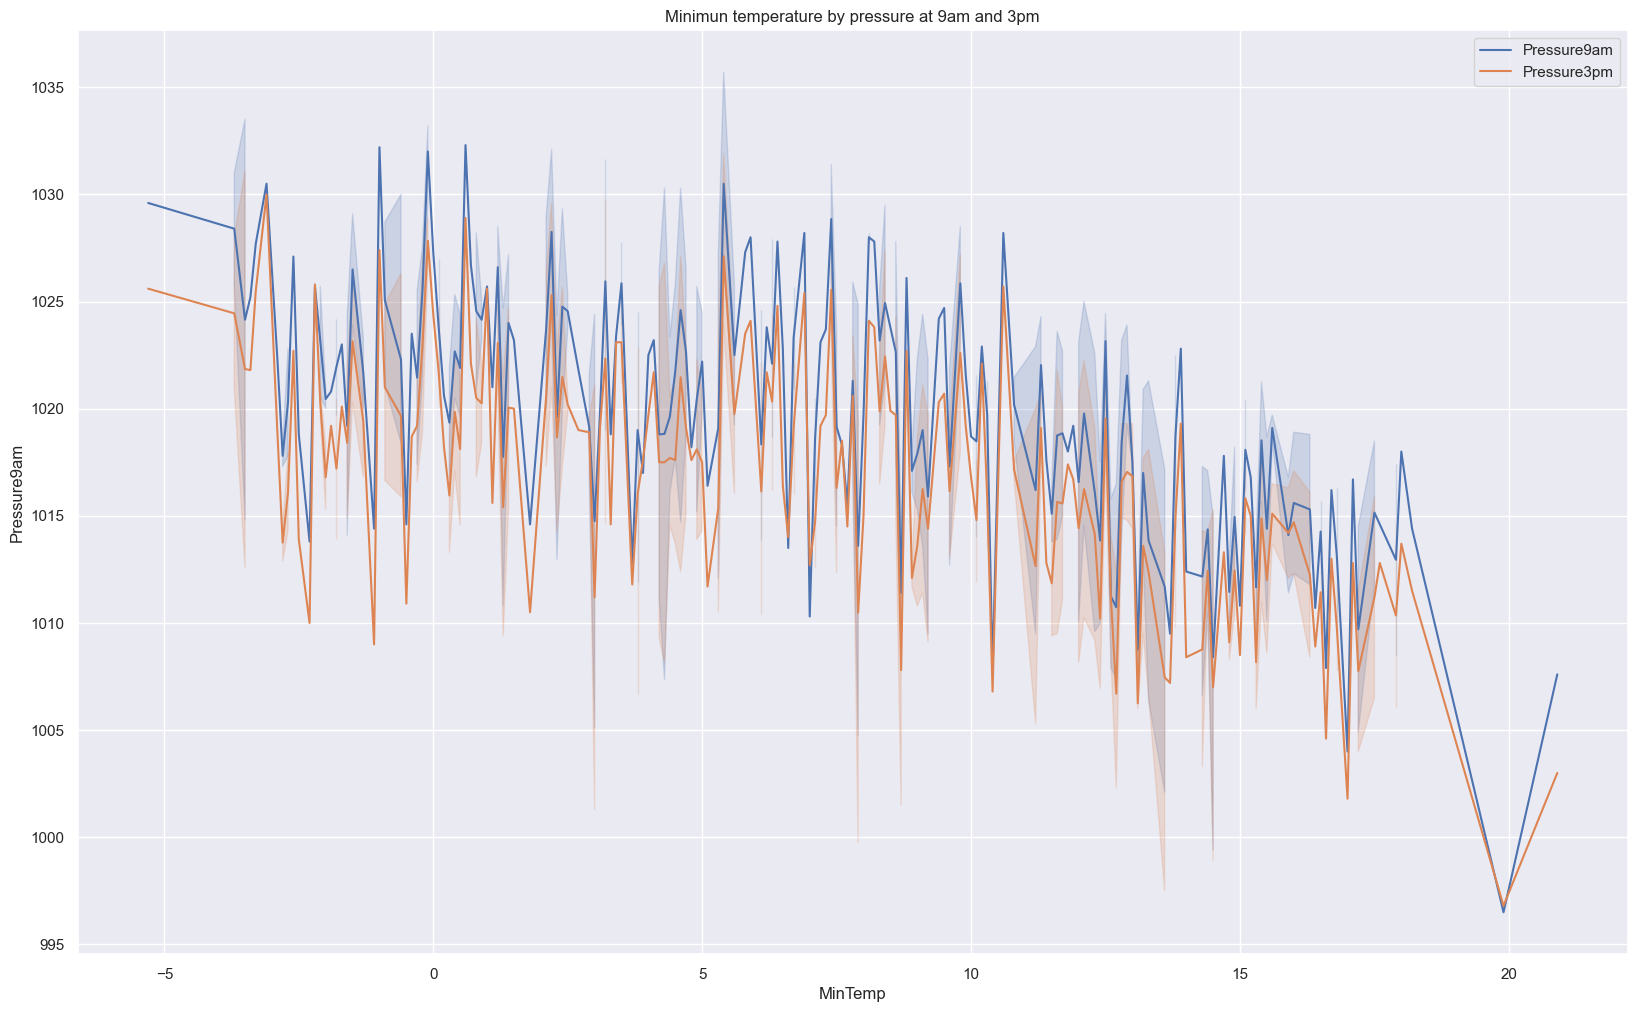

In [12]:
fig,ax = plt.subplots()
ax = sns.lineplot(data = weather_df,  x="MinTemp", y="Pressure9am",label="Pressure9am")
ax1 = sns.lineplot(data = weather_df,  x="MinTemp",y="Pressure3pm",label="Pressure3pm")
ax.set_title("Minimun temperature by pressure at 9am and 3pm")
plt.legend()

Text(0.5, 1.0, 'Min temperature by wind direction at 9am and whether or not it rains')

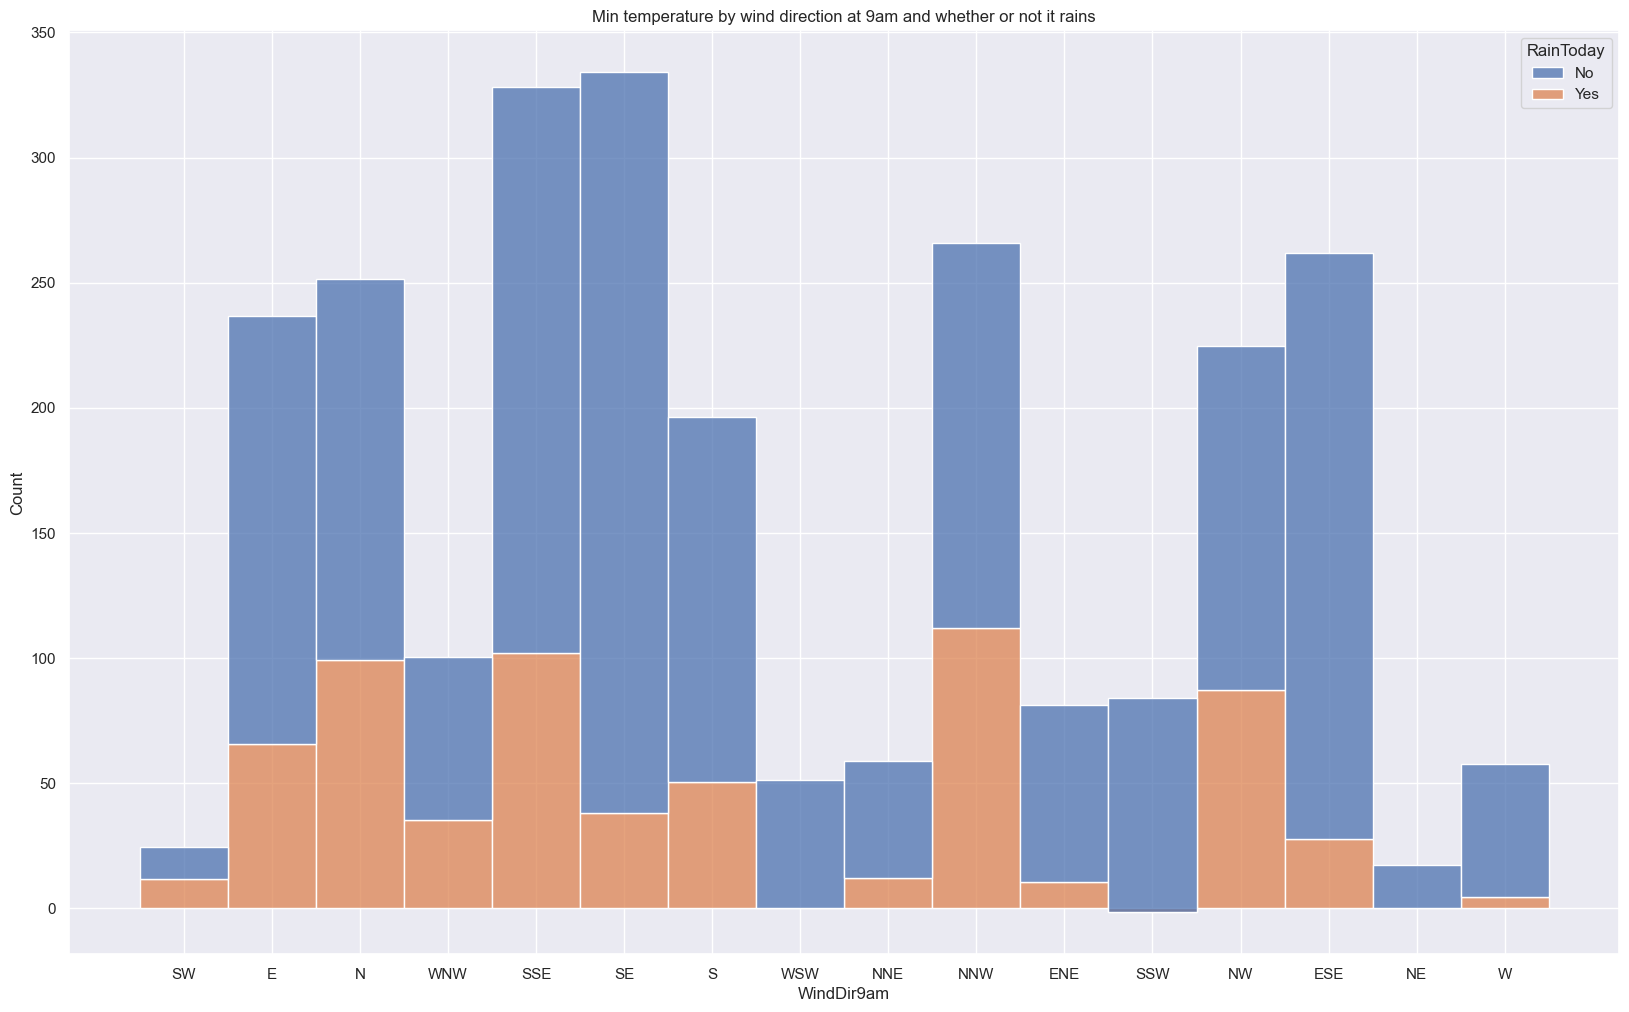

In [13]:
bar = sns.histplot(data = weather_df,x= "WindDir9am", weights= "MinTemp", hue = "RainToday", multiple="stack")
bar.set_title("Min temperature by wind direction at 9am and whether or not it rains")

In [14]:
filerex = weather_df.select_dtypes(include = ["int64","float64"])
corr_matrix = filerex.corr()
corr_matrix["MinTemp"].sort_values(ascending = False)

MinTemp          1.000000
Temp9am          0.916745
MaxTemp          0.752471
Temp3pm          0.722730
Evaporation      0.649930
RISK_MM          0.218551
WindGustSpeed    0.218020
Cloud9am         0.215776
Rainfall         0.201939
WindSpeed9am     0.127542
Cloud3pm         0.118397
Sunshine         0.035711
Humidity3pm     -0.040709
WindSpeed3pm    -0.065922
Humidity9am     -0.207897
Pressure3pm     -0.498007
Pressure9am     -0.501707
Name: MinTemp, dtype: float64

In [15]:
train_set, test_set = train_test_split(weather_df, test_size = 0.2,random_state = 42)
train_set.head()
test_set.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
193,9.4,19.2,0.0,2.2,7.7,NaN,24.0,E,NNW,4.0,...,47,1024.2,1020.3,7,1,12.1,18.8,No,0.0,No
33,13.3,26.5,6.6,3.8,11.8,NW,50.0,NW,WNW,20.0,...,40,1007.3,1006.3,5,2,18.8,25.1,Yes,0.0,No
15,12.4,32.1,0.0,8.4,11.1,E,46.0,SE,WSW,7.0,...,22,1017.9,1012.8,0,3,19.1,30.7,No,0.0,No
310,6.3,16.1,0.0,1.8,2.9,S,35.0,S,S,19.0,...,33,1019.7,1016.2,7,7,10.0,15.7,No,0.0,No
57,15.1,28.3,14.4,8.8,13.2,NNW,28.0,NNW,NW,6.0,...,44,1016.8,1013.4,1,5,18.3,27.4,Yes,0.0,No


In [16]:
target_train = train_set["MinTemp"].copy()
train_set = train_set.drop(["MinTemp"], axis = 1)
target_test = test_set["MinTemp"].copy()
test_set = test_set.drop(["MinTemp"], axis = 1)

In [17]:
le_train = train_set[["RainToday","RainTomorrow"]].copy()
le_test = test_set[["RainToday","RainTomorrow"]].copy()
onehot_train = train_set[["WindGustDir","WindDir9am","WindDir3pm"]].copy()
onehot_test = test_set[["WindGustDir","WindDir9am","WindDir3pm"]].copy()


In [18]:
num_train = train_set.drop(["RainToday","RainTomorrow","WindGustDir","WindDir9am","WindDir3pm"], axis = 1)
num_test = test_set.drop(["RainToday","RainTomorrow","WindGustDir","WindDir9am","WindDir3pm"], axis = 1)

In [19]:
imputer = SimpleImputer(strategy='median')
imputer.fit(num_train)
num_train = imputer.transform(num_train)
num_test = imputer.transform(num_test)
num_train = pd.DataFrame(data = num_train, columns = ['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RISK_MM'])
print(num_train)
num_test = pd.DataFrame(data = num_test, columns = ['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RISK_MM'])

     MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0       16.0       8.2          5.4      11.8           57.0          11.0   
1       17.4       0.0          2.6       7.3           24.0           2.0   
2       33.8       0.0          5.2      11.1           35.0           7.0   
3       27.8       0.0          6.4       9.9           35.0           6.0   
4       27.4       0.2          7.6      12.1           52.0           6.0   
..       ...       ...          ...       ...            ...           ...   
287     35.8       0.0          9.4      13.3           57.0           6.0   
288     25.2       0.0          5.6      12.6           35.0           7.0   
289     10.7       1.4          0.8       9.1           59.0          28.0   
290     21.1      13.2          6.6       8.6           41.0           7.0   
291     26.0       0.0          5.0      10.7           31.0           7.0   

     WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Press

In [20]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(le_train)
le_train = imputer_cat.transform(le_train)
le_test = imputer_cat.transform(le_test)
le_train = pd.DataFrame(data = le_train, columns = ["RainToday","RainTomorrow"])
le_test = pd.DataFrame(data = le_test, columns = ["RainToday","RainTomorrow"])

In [21]:
le = LabelEncoder()
le_train["RainToday"] = le.fit_transform(le_train["RainToday"])
le_test["RainToday"] = le.fit_transform(le_test["RainToday"])
le_train["RainTomorrow"] = le.fit_transform(le_train["RainTomorrow"])
print(le_train)
le_test["RainTomorrow"] = le.fit_transform(le_test["RainTomorrow"])

     RainToday  RainTomorrow
0            1             0
1            0             0
2            0             0
3            0             0
4            0             0
..         ...           ...
287          0             0
288          0             0
289          1             0
290          1             0
291          0             1

[292 rows x 2 columns]


In [22]:
imputer_cat.fit(onehot_train)
onehot_train = imputer_cat.transform(onehot_train)
onehot_test = imputer_cat.transform(onehot_test)
onehot_train = pd.DataFrame(data = onehot_train, columns = ["WindGustDir","WindDir9am","WindDir3pm"])
onehot_test = pd.DataFrame(data = onehot_test, columns = ["WindGustDir","WindDir9am","WindDir3pm"])

In [23]:
lb = LabelBinarizer()
onehot_train["WindGustDir"] = lb.fit_transform(onehot_train[["WindGustDir"]])
onehot_test["WindGustDir"] = lb.fit_transform(onehot_test[["WindGustDir"]])
onehot_train["WindDir9am"] = lb.fit_transform(onehot_train[["WindDir9am"]])
onehot_test["WindDir9am"] = lb.fit_transform(onehot_test[["WindDir9am"]])
onehot_train["WindDir3pm"] = lb.fit_transform(onehot_train[["WindDir3pm"]])
onehot_test["WindDir3pm"] = lb.fit_transform(onehot_test[["WindDir3pm"]])

In [24]:
train_pre = num_train.join(le_train)
print(train_pre)
train_pre = train_pre.join(onehot_train)
test_pre = num_test.join(le_test)
test_pre = test_pre.join(onehot_test)

     MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
0       16.0       8.2          5.4      11.8           57.0          11.0   
1       17.4       0.0          2.6       7.3           24.0           2.0   
2       33.8       0.0          5.2      11.1           35.0           7.0   
3       27.8       0.0          6.4       9.9           35.0           6.0   
4       27.4       0.2          7.6      12.1           52.0           6.0   
..       ...       ...          ...       ...            ...           ...   
287     35.8       0.0          9.4      13.3           57.0           6.0   
288     25.2       0.0          5.6      12.6           35.0           7.0   
289     10.7       1.4          0.8       9.1           59.0          28.0   
290     21.1      13.2          6.6       8.6           41.0           7.0   
291     26.0       0.0          5.0      10.7           31.0           7.0   

     WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Press

In [25]:
sts = StandardScaler()
print(train_pre.shape)
X_train=sts.fit_transform(train_pre)
y_train = target_train
X_test = sts.transform(test_pre)
y_test = target_test


(292, 21)


In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [27]:
lin_reg_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test,lin_reg_pred)
lin_per_error = r2_score(y_test,lin_reg_pred)*100
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
print(lin_per_error)

1.739340541287089
91.67142812991158


In [28]:
lin_abs = mean_absolute_error(y_test,lin_reg_pred)
lin_abs

1.360857028736391

In [29]:
decision_tree = DecisionTreeRegressor()


In [30]:
parameters={"splitter":["best"],
            "max_depth" : [5,7,9],
           "min_samples_leaf":[1,2],
           "min_weight_fraction_leaf":[0.1,0.2],
           "max_features":["auto","log2"],
           "max_leaf_nodes":[None,10,20] }
dt_grid = GridSearchCV(decision_tree,param_grid = parameters,scoring='neg_mean_squared_error',cv=5 ,verbose=3)
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.2, splitter=best;, s

E:\anaconda mini\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda mini\envs\myenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda mini\envs\myenv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "E:\anaconda mini\envs\myenv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "E:\anaconda mini\envs\myenv\

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 7, 9],
                         'max_features': ['auto', 'log2'],
                         'max_leaf_nodes': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_weight_fraction_leaf': [0.1, 0.2],
                         'splitter': ['best']},
             scoring='neg_mean_squared_error', verbose=3)

In [31]:
dt_grid.best_params_

{'max_depth': 9,
 'max_features': 'log2',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [32]:
decision_tree = DecisionTreeRegressor(max_depth= 5,
 max_features= 'log2',
 max_leaf_nodes= 20,
 min_samples_leaf= 1,
 min_weight_fraction_leaf= 0.1,
 splitter= 'best')
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='log2', max_leaf_nodes=20,
                      min_weight_fraction_leaf=0.1)

In [33]:
dec_pred = decision_tree.predict(X_test)
dec_mse = mean_squared_error(y_test,dec_pred)
dec_per_error = r2_score(y_test,dec_pred)*100
dec_rmse = np.sqrt(dec_mse)
print(dec_rmse)
print(dec_per_error)

3.6092929524172956
64.13708679124562


In [34]:
dec_abs = mean_absolute_error(y_test,dec_pred)
dec_abs

2.8716444015008205

In [35]:
param_grid = [
    
    {'n_estimators' : [3 , 10 , 30], 'max_features' : [2 , 4 , 6 , 8]},
    {'bootstrap':[False] ,'n_estimators' : [3 , 10 ] , "max_features" : [2 ,3 ,4 ]},
]

In [36]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg , param_grid , cv = 5 , scoring = 'neg_mean_squared_error' , return_train_score= False)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [37]:
best_ran = grid_search.best_estimator_
best_ran


RandomForestRegressor(max_features=8, n_estimators=30)

In [38]:
for_pred = best_ran.predict(X_test)
for_mse = mean_squared_error(y_test,for_pred)
for_per_error = r2_score(y_test,for_pred)*100
for_rmse = np.sqrt(for_mse)
print(for_rmse)
print(for_per_error)

2.2492644777105895
86.07220559598623


In [39]:
for_abs = mean_absolute_error(y_test,for_pred)
for_abs

1.8113513513513513

In [40]:
xgb = XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [41]:
xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


E:\anaconda mini\envs\myenv\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:30:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
E:\anaconda mini\envs\myenv\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:30:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [42]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [43]:
xgb_pred = xgb_grid.predict(X_test)
xgb_mse = mean_squared_error(y_test,xgb_pred)
xgb_per_error = r2_score(y_test,xgb_pred)*100
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse)
print(xgb_per_error)

2.0543469775763885
88.38153128039637


In [44]:
xgb_abs = mean_absolute_error(y_test,xgb_pred)
xgb_abs

1.5894222437328585

In [45]:
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],
         'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
svr = SVR()
svr_grid = GridSearchCV(svr, param, cv=5, n_jobs = -1, verbose = 2)
svr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             verbose=2)

In [46]:
svr_best = svr_grid.best_estimator_
svr_best

SVR(C=1, coef0=0.01, gamma='auto', kernel='linear')

In [47]:
svr_pred = svr_best.predict(X_test)
svr_mse = mean_squared_error(y_test,svr_pred)
svr_per_error = r2_score(y_test, svr_pred)*100
svr_rmse = np.sqrt(svr_mse)
print(svr_rmse)
print(svr_per_error)


1.7282662772097537
91.77714541996225


In [48]:
svr_abs = mean_absolute_error(y_test,svr_pred)
svr_abs

1.3553178257014151

In [49]:
import pandas as pd

scores = [["LR", lin_mse ,lin_rmse, lin_abs,lin_per_error],["DT", dec_mse, dec_rmse, dec_abs,dec_per_error],
         ["RF", for_mse, for_rmse, for_abs,for_per_error], ["XGB", xgb_mse, xgb_rmse, xgb_abs,xgb_per_error],["SVR", svr_mse, svr_rmse,svr_abs,svr_per_error]]
scores_df = pd.DataFrame(scores, columns=["Model", "MSE", "RMSE", "MAE","Accuracy %"])
scores_df = scores_df.sort_values(by="RMSE", ascending=False)
scores_df


,Model,MSE,RMSE,MAE,Accuracy %
1,DT,13.026996,3.609293,2.871644,64.137087
2,RF,5.059191,2.249264,1.811351,86.072206
3,XGB,4.220342,2.054347,1.589422,88.381531
0,LR,3.025306,1.739341,1.360857,91.671428
4,SVR,2.986904,1.728266,1.355318,91.777145


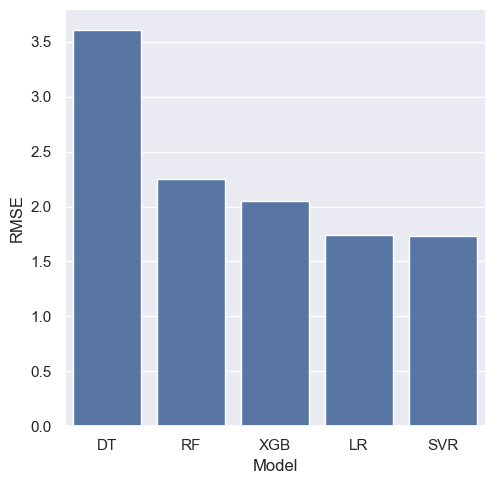

In [50]:
sns.catplot(data=scores_df, kind="bar",x ="Model", y="RMSE")


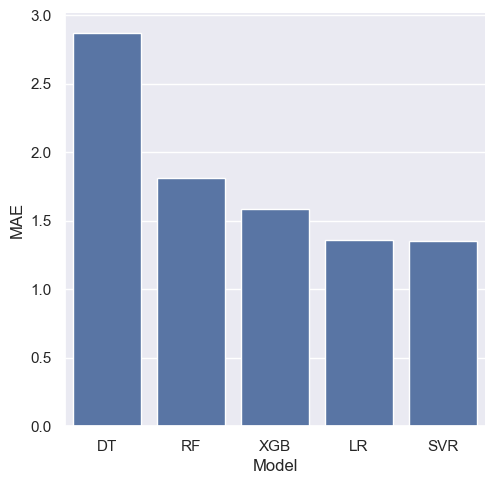

In [51]:
sns.catplot(data=scores_df, kind="bar",x ="Model", y="MAE")

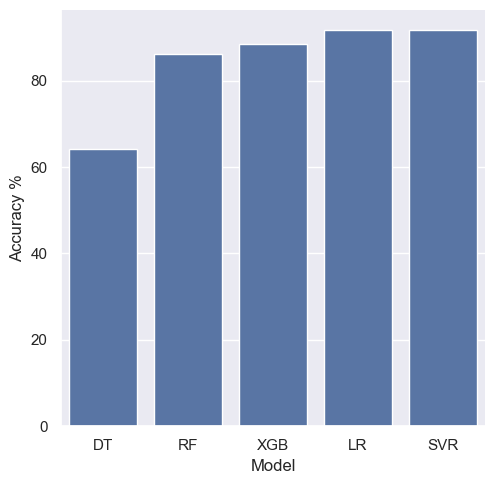

In [52]:
sns.catplot(data=scores_df, kind="bar",x ="Model", y="Accuracy %")